In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [7]:
data = pd.read_csv('Patient_records.csv')
data

,SettlementValue,AccidentType,Injury_Prognosis,SpecialHealthExpenses,SpecialReduction,SpecialOverage,GeneralRest,SpecialAdditionalInjury,SpecialEarningsLoss,SpecialUsageLoss,...,Accident Date,Claim Date,Vehicle Age,Driver Age,Number of Passengers,Accident Description,Injury Description,Police Report Filed,Witness Present,Gender
0,520.00,Rear end,E. 5 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-11-10 11:22:24.508901,2024-06-11 11:22:24.508901,13.0,33.0,4.0,Side collision at an intersection.,Whiplash and minor bruises.,Yes,Yes,Male
1,870.00,Rear end,B. 2 months,0.0,0.0,0.0,520.0,0.0,0.0,90.0,...,2023-06-25 00:55:01.140228,2024-01-09 00:55:01.140228,4.0,45.0,2.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
2,2140.00,Other side pulled out of side road,G. 7 months,0.0,0.0,0.0,1400.0,0.0,0.0,0.0,...,2020-02-23 17:43:47.805561,2020-03-01 17:43:47.805561,9.0,45.0,4.0,Lost control on a snowy road.,Whiplash and minor bruises.,Yes,No,Female
3,520.00,Rear end - Clt pushed into next vehicle,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-10-02 04:36:32.118423,2021-10-13 04:36:32.118423,5.0,62.0,1.0,Side collision at an intersection.,Minor cuts and scrapes.,Yes,Yes,Female
4,260.00,Rear end,C. 3 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-04-02 05:13:07.117423,2023-04-14 05:13:07.117423,9.0,78.0,1.0,Lost control on a snowy road.,Concussion and bruised ribs.,Yes,Yes,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,275.00,Other side turned across Clt's path,A. 1 month,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2021-08-25 19:24:19.731946,2022-06-30 19:24:19.731946,18.0,18.0,3.0,Hit a deer on the highway.,Concussion and bruised ribs.,No,No,Other
4996,1074.35,Other side pulled out of side road,H. 8 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-05-30 15:05:56.471294,2023-06-13 15:05:56.471294,NaN,70.0,4.0,Side collision at an intersection.,Fractured arm and leg.,Yes,No,Female
4997,2020.00,Other side pulled out of side road,F. 6 months,0.0,0.0,0.0,2020.0,0.0,0.0,0.0,...,2023-03-09 13:27:25.529105,2023-08-05 13:27:25.529105,11.0,43.0,1.0,Swerved to avoid another vehicle.,Minor cuts and scrapes.,No,Yes,Male
4998,781.20,Rear end - 3 car - Clt at front,D. 4 months,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2023-02-09 05:32:42.392478,2023-10-18 05:32:42.392478,10.0,69.0,1.0,Lost control on a snowy road.,Sprained ankle and wrist.,No,No,Female


<Axes: xlabel='AccidentType'>

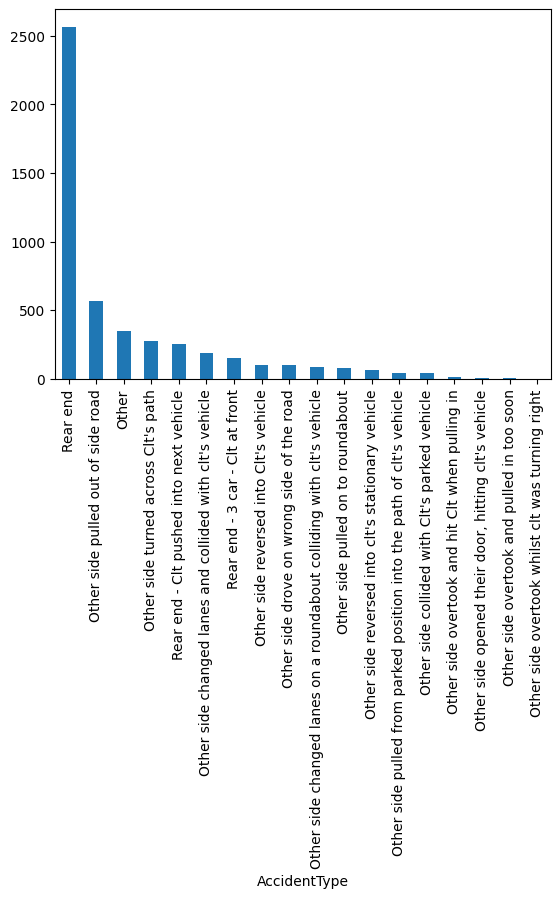

In [8]:
data['AccidentType'].value_counts().plot(kind='bar')

<Axes: xlabel='Accident Description'>

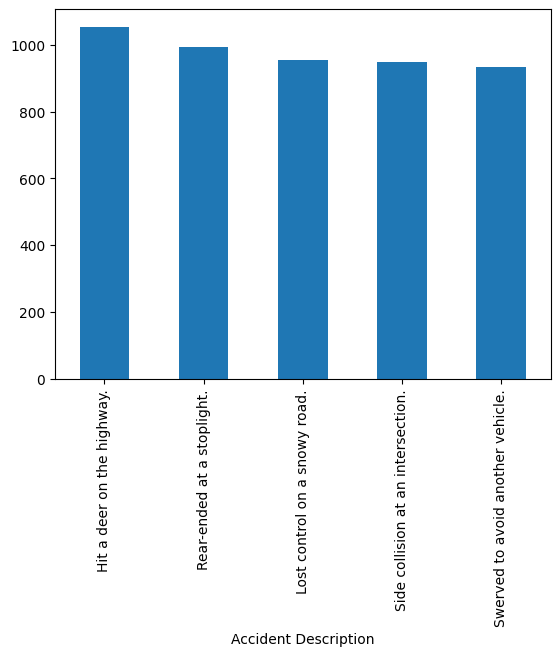

In [9]:
data['Accident Description'].value_counts().plot(kind='bar')

<Axes: xlabel='Injury Description'>

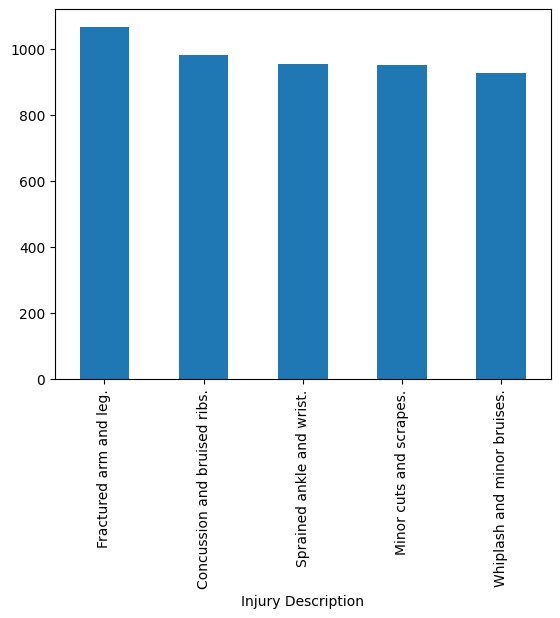

In [10]:
data['Injury Description'].value_counts().plot(kind='bar')

In [11]:
# Extract numeric values explicitly using raw strings to avoid syntax warnings
data['Injury_Prognosis_Days'] = (
    data['Injury_Prognosis']
    .str.extract(r'(\d+)')
    .fillna(0)
    .astype(int) * 30
)

# Verify results
print(data[['Injury_Prognosis', 'Injury_Prognosis_Days']].head(25))

   Injury_Prognosis  Injury_Prognosis_Days
0       E. 5 months                    150
1       B. 2 months                     60
2       G. 7 months                    210
3       D. 4 months                    120
4       C. 3 months                     90
5       F. 6 months                    180
6               NaN                      0
7       H. 8 months                    240
8       F. 6 months                    180
9       B. 2 months                     60
10      F. 6 months                    180
11      F. 6 months                    180
12      G. 7 months                    210
13      E. 5 months                    150
14      I. 9 months                    270
15      I. 9 months                    270
16      E. 5 months                    150
17      E. 5 months                    150
18      G. 7 months                    210
19      D. 4 months                    120
20      H. 8 months                    240
21      F. 6 months                    180
22      D. 

In [20]:
import pandas as pd
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('Patient_Records.csv')

# Drop rows with missing target values
data = data.dropna(subset=['SettlementValue'])

# Preprocessing steps:
# Encode AccidentType
label_encoder = LabelEncoder()
data['AccidentTypeEncoded'] = label_encoder.fit_transform(data['AccidentType'])

# Convert 'Injury_Prognosis' to numeric days
data['Injury_Prognosis_Days'] = data['Injury_Prognosis'].str.extract(r'(\d+)').fillna(0).astype(int) * 30

# Select features and target variable
X = data[['AccidentTypeEncoded', 'Injury_Prognosis_Days', 'Driver Age', 'Vehicle Age', 'Number of Passengers']]
y = data['SettlementValue']

# Split dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")



Mean Squared Error: 565216.2622949901
R-squared Score: 0.2522680986005389


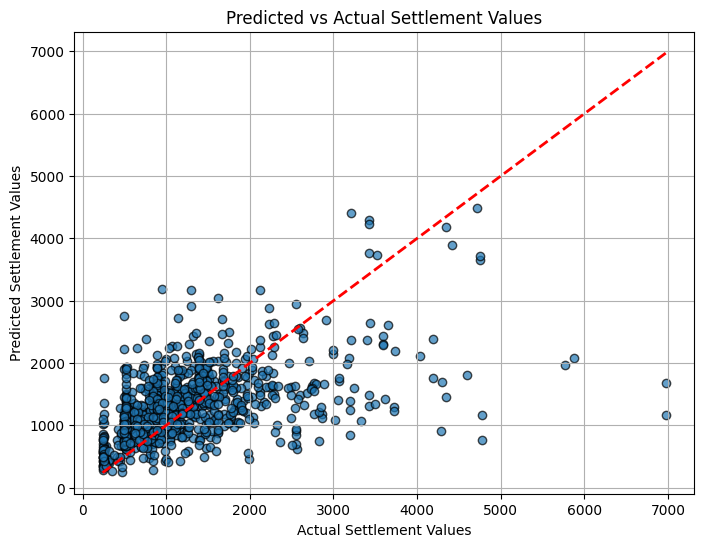

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Settlement Values")
plt.ylabel("Predicted Settlement Values")
plt.title("Predicted vs Actual Settlement Values")
plt.grid(True)
plt.show()